## Plotting mean X position of all worms against Chemotaxis Index

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import pathlib as plb
from statistics import mean
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import statsmodels.api as sm


C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading in the data
Data needed:
1. S1means_df.csv: Unblinded image analysis data from Screen 1 with mean position for each replicate
2. S1_xs.csv: all of the worms and their positions for each replicate from each condition

In [4]:
metadata = pd.read_csv('/Users/Emily/Documents/S1/data_analysis/S1means_df.csv', index_col=0)
s1_xs = pd.read_csv('/Users/Emily/Documents/S1/data_analysis/S1_xs.csv', index_col=0)

,WellNo,Total Worms,Chemotaxis,Compound,File Name,Well width,Plate ID,MeanPos,MeanPos_mm
0,3A,229.0,-0.265957,5-Aminolevulinic acid (hydrochloride),S1_002,3058.0,S1_R1_7,1774.034934,-5.050406
1,3B,275.0,-0.125541,Alyssin,S1_002,3065.0,S1_R1_7,1662.763636,-2.695164
2,3C,231.0,-0.353535,Methyl palmitate,S1_002,3043.0,S1_R1_7,1803.086580,-5.665333
3,3D,221.0,-0.255814,Safranal,S1_002,3075.0,S1_R1_7,1739.389140,-4.317070
4,4A,270.0,-0.176991,Spinosad,S1_002,3051.0,S1_R1_8,1665.633333,-2.755906


### Creating numerical categories to visualize total worm counts

In [4]:
# Generating a callable function
def addSize(row):
    if row['Total Worms'] <= 150:
        size = 1
    elif (row['Total Worms']>150) & (row['Total Worms']<=250):
        size = 2
    elif (row['Total Worms']>250) & (row['Total Worms']<=350):
        size = 3
    elif (row['Total Worms']>350) & (row['Total Worms']<=450):
        size = 4
    elif row['Total Worms']>450:
        size = 5
    return size

#Iterating over the unblinded image analysis dataframe and adding categorical size data
metadata['Size']=metadata.apply(
    lambda row: addSize(row), axis=1)
print(len(metadata))

288


### Calculating stats for the linear model to generate the residual plot

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(metadata['MeanPos_mm'], metadata['Chemotaxis'])
print(slope, intercept, r_value, p_value, std_err)

0.06060182448155039 -0.01831926987693218 0.9827804475458338 8.75518461405154e-212 0.0006737432369591764


In [6]:
CI_Y = metadata['Chemotaxis']
mean_X = metadata['MeanPos_mm']
mean_X = sm.add_constant(mean_X)
model = sm.OLS(CI_Y, mean_X).fit()

C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\statsmodels\tsa\tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Chemotaxis   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     8091.
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.76e-212
Time:                        08:46:34   Log-Likelihood:                 471.99
No. Observations:                 288   AIC:                            -940.0
Df Residuals:                     286   BIC:                            -932.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0183      0.003     -6.272      0.0

In [8]:
print(model.params)

const        -0.018319
MeanPos_mm    0.060602
dtype: float64


C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Emily\miniconda3\envs\neuroplant\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


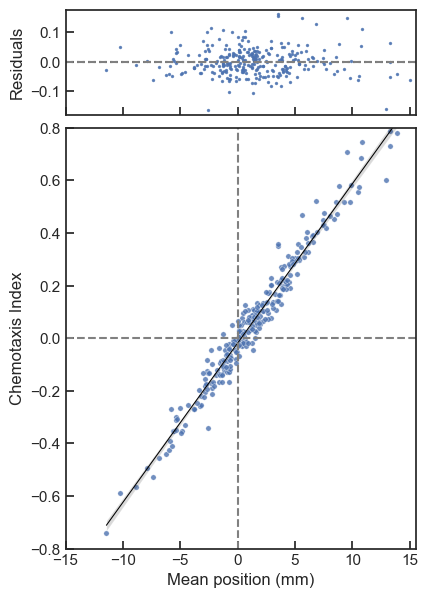

In [9]:


sb.set(style='ticks')
gridkw = dict(height_ratios=[.25, 1])
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw=gridkw, sharex=True, figsize=(5,7))

#Plotting the residual data within the inset axes
sb.residplot(x=metadata['MeanPos_mm'], y=metadata['Chemotaxis'], ax=ax1, scatter_kws={'s':2})

             
ax1.axhline(y=0, ls='--', c='gray')
ax1.set(xlim = (-15, 15.5))
ax1.set_ylabel('Residuals')
ax1.set_xlabel('')
ax1.tick_params(axis="both",direction="in")


# Scatterplot of Mean Position by X 
sb.scatterplot(metadata['MeanPos_mm'],metadata['Chemotaxis'], palette='colorblind',
       alpha = .8,ax=ax2, s=15)
# Overlay the regression
sb.regplot(metadata['MeanPos_mm'], metadata['Chemotaxis'], scatter = False,
    fit_reg = True, color = 'black', line_kws={'linewidth':.75}, ax=ax2)

ax2.set(ylim = (-.8, .8)) 
ax2.set(xlim = (-15, 15.5))
ax2.axhline(y=0, ls='--', c='gray')
ax2.axvline(x=0, ls='--', c='gray')

ax2.set_xlabel('Mean position (mm)')
ax2.set_ylabel('Chemotaxis Index')
ax2.tick_params(axis="both",direction="in")


plt.rcParams['svg.fonttype'] = 'none'
fig.subplots_adjust(hspace=.05, left=.2)
plt.show()
#fig.savefig('C:/Users/Emily/Desktop/NPScreen_figs/stacked_CI_X.svg', dpi=300)